In [46]:
# Import dependencies
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
color_theme = sns.set_palette("muted")
sns.set(rc={'axes.facecolor': 'gainsboro', 'figure.facecolor':'whitesmoke'})
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline


In [26]:
# Load the data
df = pd.read_csv('googleplaystore_raw_data.csv')

In [27]:
# Exploring the Dataset
# Now that we've loaded the dataset into a DataFrame, let's take a closer look at its dimensions, structure, and summary statistics:

# Print the dimensions of the DataFrame
print("Dimensions:", df.shape)

# Print the structure of the DataFrame
print("\nStructure:\n", df.info())

# Print the summary statistics of the DataFrame
print("\nSummary Statistics:\n", df.describe())

Dimensions: (10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB

Structure:
 None

Summary Statistics:
             Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25% 

In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
# Dealing with Missing Values
# Next, let's check for missing values and decide on an appropriate strategy for dealing with them:

# Check for missing values
print(df.isnull().sum())
print()

# Remove rows with missing values
df = df.dropna()

# Confirm that there are no more missing values
print("After Removing rows with missing values")
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

After Removing rows with missing values
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [30]:
# Dealing with Duplicates
# Now, let's check for duplicates and decide on an appropriate strategy for dealing with them:

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Confirm that there are no more duplicates
print("Number of duplicates after Removing:", df.duplicated().sum())

Number of duplicates: 474
Number of duplicates after Removing: 0


In [31]:
# Cleaning the dataset:

# Remove non-numeric characters from the 'Size' column
df['Size'] = df['Size'].str.replace('M','')
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Remove non-numeric characters from the 'Price' column
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remove commas and the '+' suffix from the 'Installs' column
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Convert columns to the appropriate data types
df['Rating'] = pd.to_numeric(df['Rating'])
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Size'] = df['Size'].astype(float)
df['Price'] = pd.to_numeric(df['Price'])

# Print the first few rows of the cleaned dataset
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  

C:\Users\Admin\AppData\Local\Temp\ipykernel_10540\542155824.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$','')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10540\542155824.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')


In [32]:
# Exporting the Cleaned Dataset
# Finally, let's export the cleaned dataset to a new CSV file for further analysis:

# Export the cleaned dataset to a new CSV file
df.to_csv("googleplaystore_cleaned_final_edit.csv", index=False)

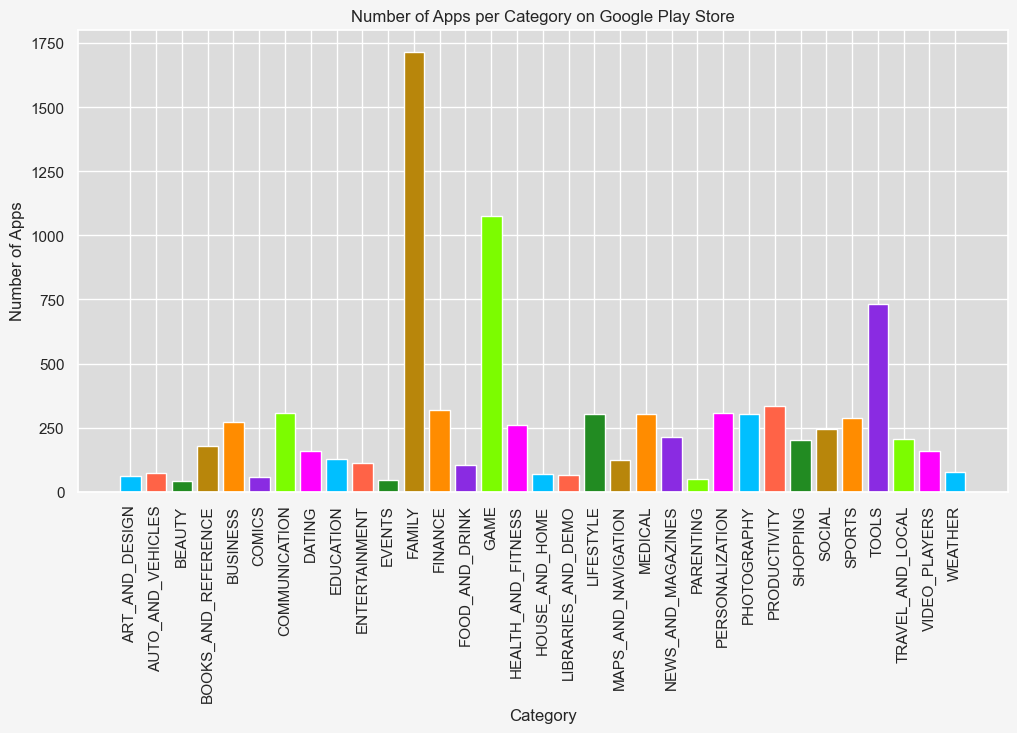

In [33]:
# Question 1: What is the distribution of app categories in the Google Play Store?
# Example : 1 histogram

import matplotlib.pyplot as plt

# Group the data by category and count the number of apps in each category
category_counts = df.groupby("Category").count()["App"]

# Create a bar chart of the category counts
color=['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange','blueviolet', 'lawngreen', 'magenta']
plt.figure(figsize=(12,6))
plt.bar(category_counts.index, category_counts.values, color=color)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.title("Number of Apps per Category on Google Play Store")
plt.show()

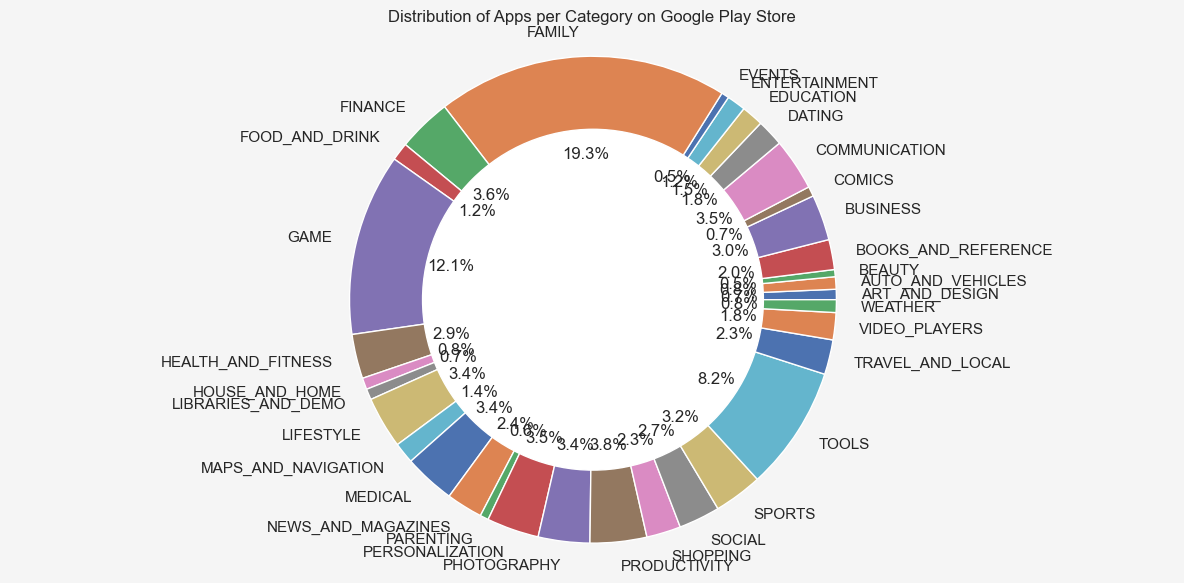

In [34]:
# Question 1.
# Example : 2 Another way to visualize this information is to create a pie chart that shows the distribution of apps across categories:

# Create a pie chart of the category counts
plt.figure(figsize=(12,6))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Apps per Category on Google Play Store")

# Add a white circle in the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

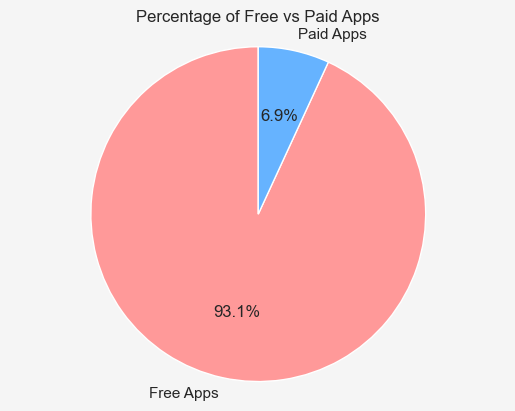

In [35]:
# Question 2: What is the percentage of free vs paid apps in the Google Play Store?
# Example : 1 : PieChart

free_apps = len(df[df['Price'] == 0])
paid_apps = len(df[df['Price'] > 0])

labels = ['Free Apps', 'Paid Apps']
sizes = [free_apps, paid_apps]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Free vs Paid Apps')
plt.show()

# The output shows that 93.1% of the apps in the Google Play Store are free.

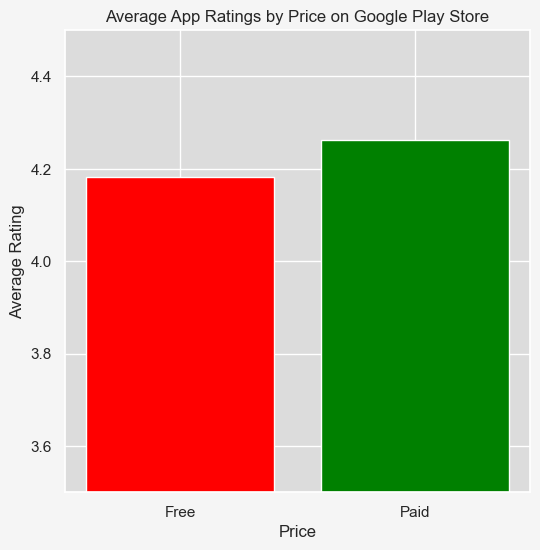

In [36]:
# Question 2. 
# Example 2: Bar chart of average app ratings by price


# Group the data by "Type" (free vs paid) and calculate the mean app rating for each group
price_ratings = df.groupby("Type").mean()["Rating"]

# Create a bar chart of the average app ratings by price
plt.figure(figsize=(6,6))
color=["red","green"]
plt.bar(price_ratings.index, price_ratings.values, color=color)
plt.title("Average App Ratings by Price on Google Play Store")
plt.xlabel("Price")
plt.ylabel("Average Rating")
plt.ylim((3.5, 4.5))
plt.show()

# The output showa that free appps have rating less than 4.2 and paids apps have more than 4.2 rating

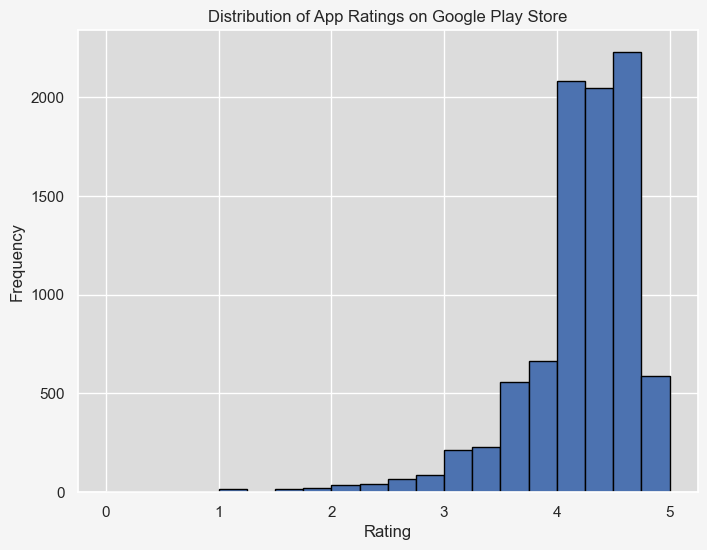

In [37]:
# Question 3: What is the distribution of app ratings in the Google Play Store?
# Example 1: Histogram of app ratings

# Create a histogram of app ratings
plt.figure(figsize=(8,6))
plt.hist(df["Rating"], bins=20, range=(0,5), edgecolor="black")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of App Ratings on Google Play Store")
plt.show()

# This will create a histogram that shows the frequency of different app rating values. We can see from the chart that the majority of apps on the Google Play Store have a rating between 4.0 and 4.5.

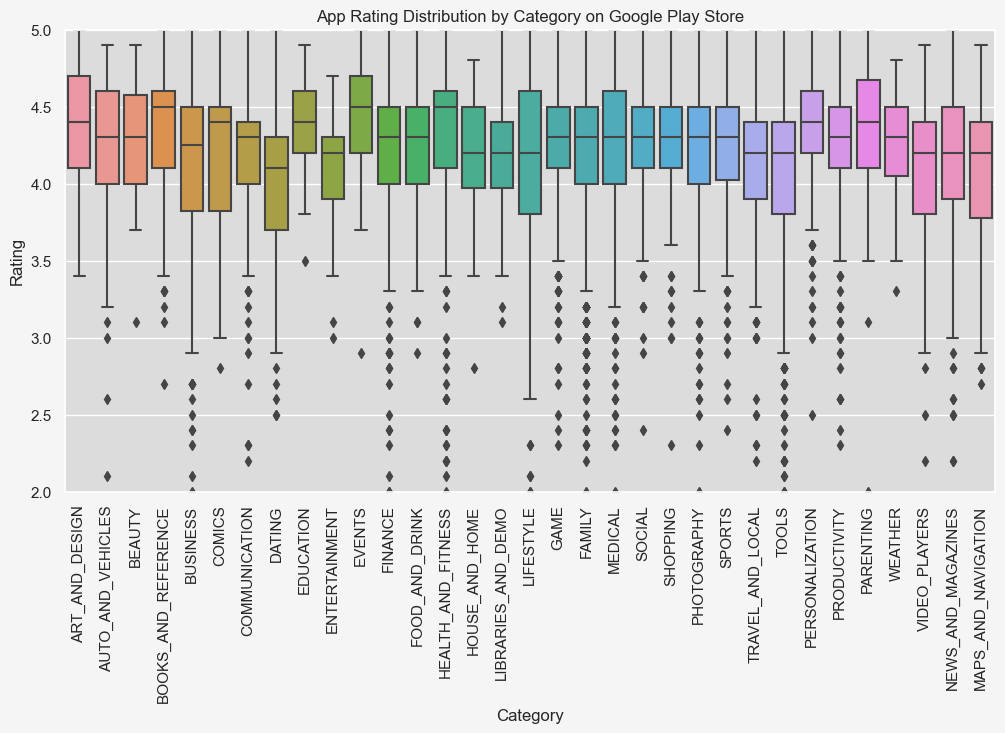

In [38]:
# Question 3.
# Example 2: Box plot of app ratings by category

# Create a box plot of app ratings by category
plt.figure(figsize=(12,6))
sns.boxplot(x="Category", y="Rating", data=df)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("App Rating Distribution by Category on Google Play Store")
plt.ylim((2,5))
plt.show()

# This will create a box plot that shows the distribution of app ratings across different categories. We can see from the chart that certain categories, such as "Events" and "Education," tend to have higher ratings than others.

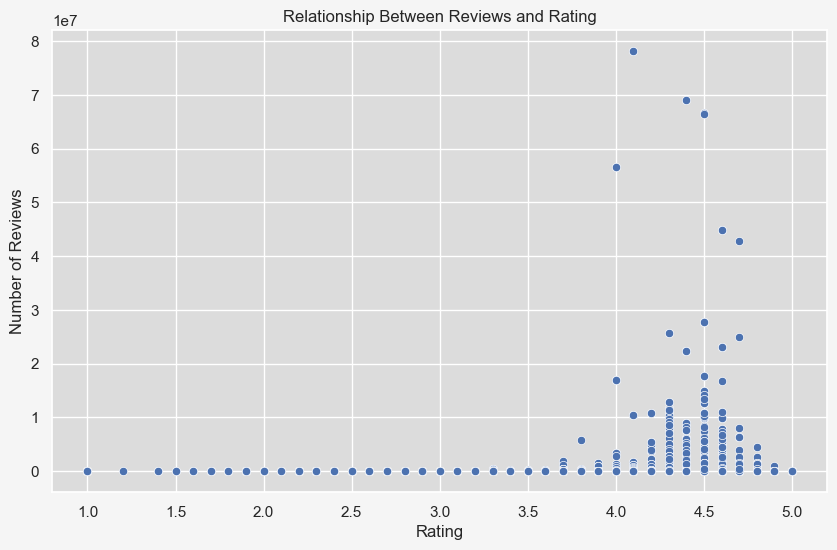

In [39]:
# Question 4. How do the number of reviews correlate with app ratings?
# Example : 1 Scatter plot showing the correlation between number of reviews and ratings

# Plot the relationship between reviews and rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rating', y='Reviews', data=df)
plt.title('Relationship Between Reviews and Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# The scatter plot shows that there is a weak positive correlation between the number of reviews and the ratings. As the number of reviews increases, the ratings tend to be slightly higher.

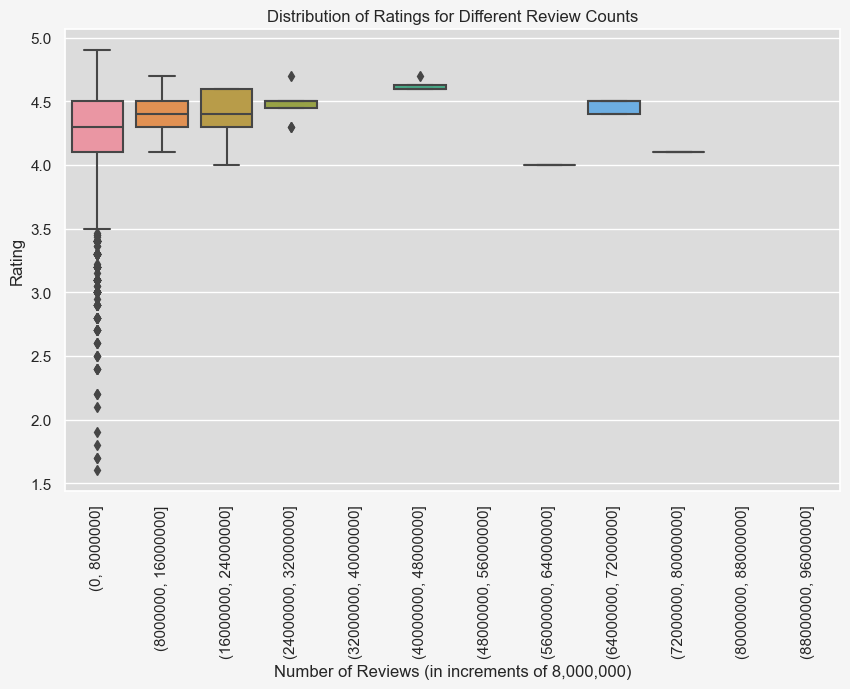

In [40]:
# Question 4.
# Example : 2 Boxplot showing the distribution of ratings for different review counts

# Group the data by number of reviews
reviews_grouped = df.groupby(['Reviews']).mean()

# Create the boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=pd.cut(reviews_grouped.index, bins=range(0, 100_000_001, 8_000_000)), y='Rating', data=reviews_grouped)
plt.title('Distribution of Ratings for Different Review Counts')
plt.xlabel('Number of Reviews (in increments of 8,000,000)')
plt.ylabel('Rating')

# Remove scientific notation from y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

# The boxplot shows the distribution of ratings for different review counts. The boxplots are divided into 10 categories based on the number of reviews. The plot shows that apps with higher numbers of reviews tend to have slightly higher ratings, with fewer outliers.

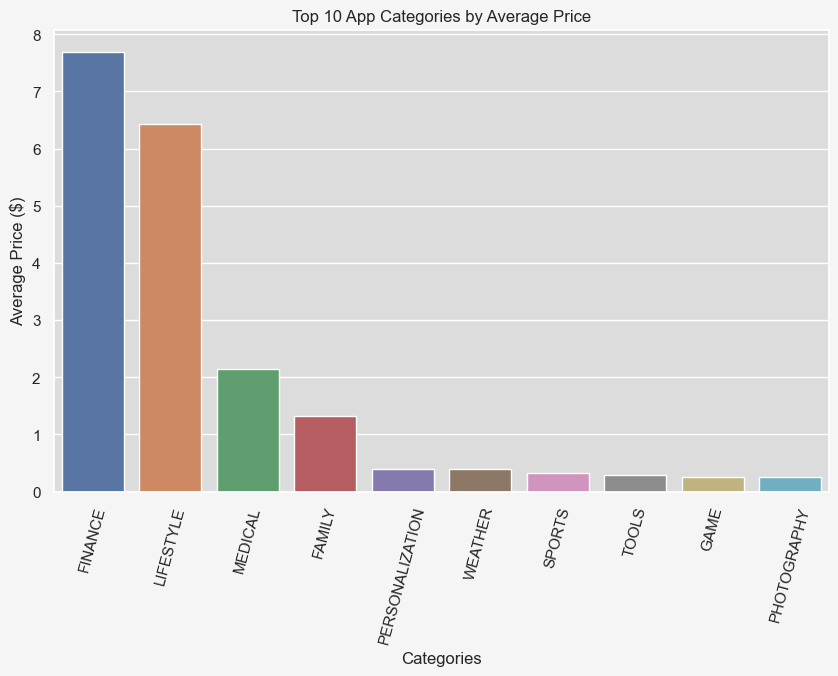

In [41]:
# Question 5. What are the most expensive app categories on the Google Play Store?

# Calculate the average price for each category
category_prices = df.groupby('Category')['Price'].mean()

# Plot the top 10 categories by average price
plt.figure(figsize=(10,6))
sns.barplot(x=category_prices.sort_values(ascending=False)[:10].index, y=category_prices.sort_values(ascending=False)[:10].values)
plt.title('Top 10 App Categories by Average Price')
plt.xlabel('Categories')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=75)
plt.show()


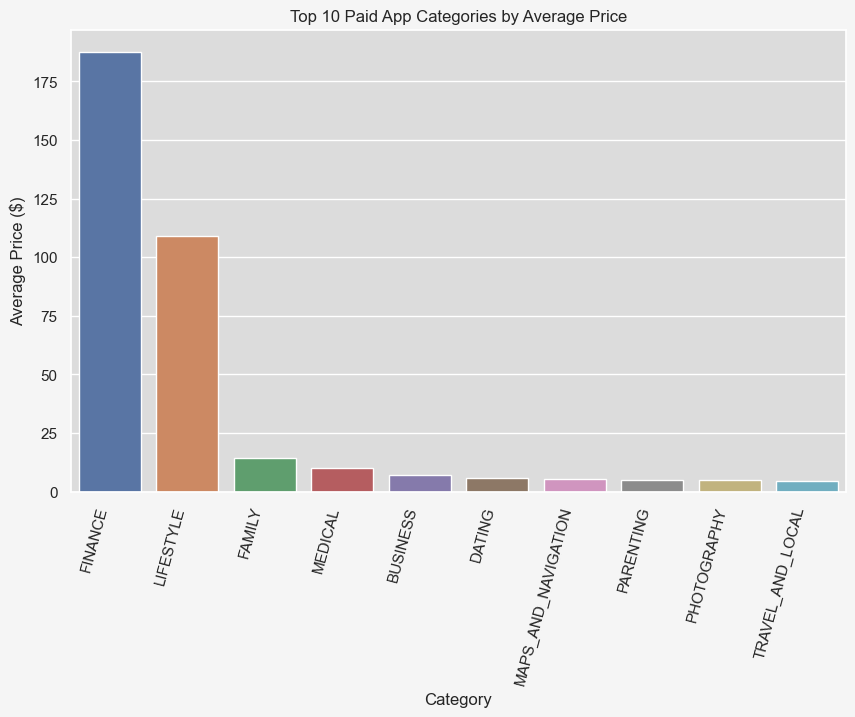

In [42]:
# Question 5. What are the most expensive app categories on the Google Play Store?

# Filter the data to only include paid apps
paid_apps = df[df['Price'] > 0]

# Calculate the average price for each category
category_prices = paid_apps.groupby('Category')['Price'].mean()

# Plot the top 10 categories by average price
plt.figure(figsize=(10,6))
ax = sns.barplot(x=category_prices.sort_values(ascending=False)[:10].index, y=category_prices.sort_values(ascending=False)[:10].values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Top 10 Paid App Categories by Average Price')
plt.xlabel('Category')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=75)
plt.show()

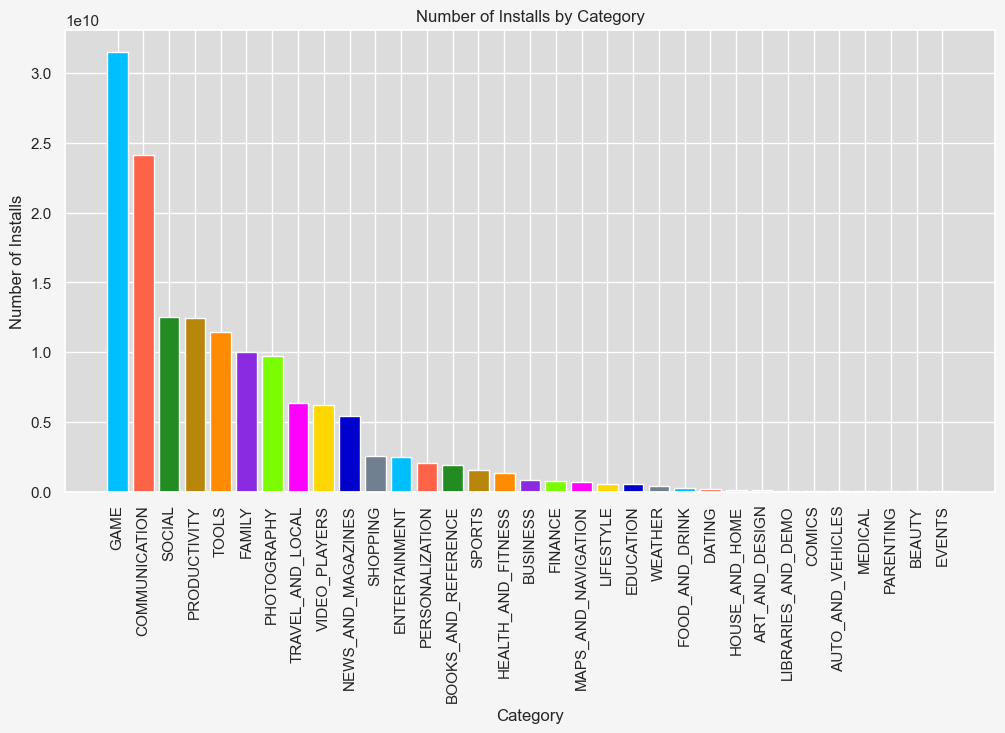

In [ ]:
# Question 6: Which app categories have the highest number of installs?

category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
color=['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange','blueviolet', 'lawngreen', 'magenta', 'gold' ,'mediumblue', 'slategrey']
plt.figure(figsize=(12,6))
plt.bar(category_installs.index, category_installs.values, color=color)
plt.xticks(rotation=90)
plt.title('Number of Installs by Category')
plt.xlabel('Category')
plt.ylabel('Number of Installs')
plt.show()

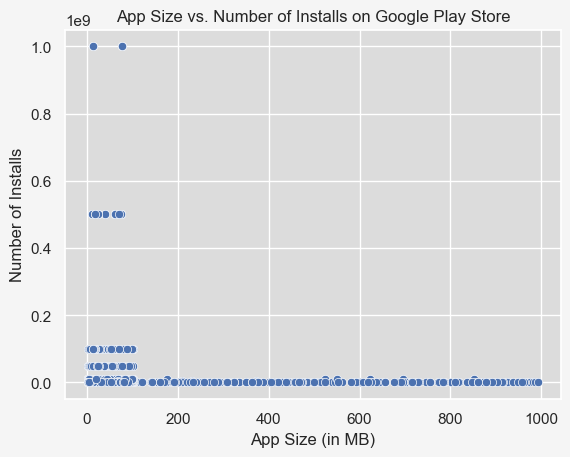

In [68]:
# Question 7: How does app size affect the number of installs?

# Example : A scatter plot that shows the relationship between app size and the number of installs.

import seaborn as sns

# Create a scatter plot of app size vs. number of installs
sns.scatterplot(x="Size", y="Installs", data=df)
plt.xlabel("App Size (in MB)")
plt.ylabel("Number of Installs")
plt.title("App Size vs. Number of Installs on Google Play Store")
plt.show()

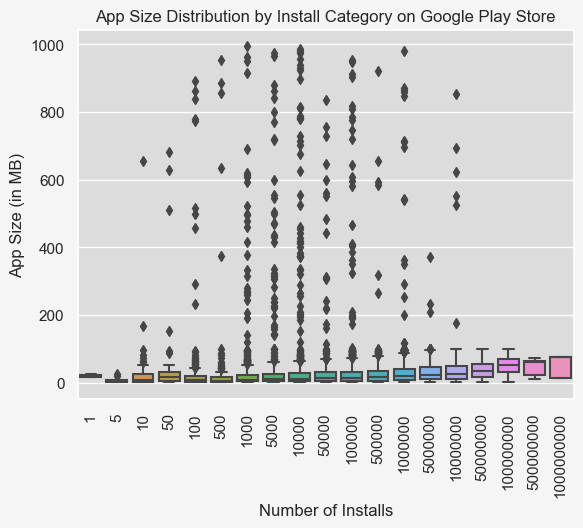

In [67]:
# Question 7. 
# Example : We can also use a box plot to show how the distribution of app sizes varies across different install categories:

# Create a box plot of app size by install category
sns.boxplot(x="Installs", y="Size", data=df)
plt.xlabel("Number of Installs")
plt.ylabel("App Size (in MB)")
plt.xticks(rotation=90)
plt.title("App Size Distribution by Install Category on Google Play Store")
plt.show()


STATISTICAL ANALYSIS

In [66]:
from scipy.stats import ttest_ind

# Split the data into paid apps and free apps
paid_apps = df[df['Type'] == 'Paid']
free_apps = df[df['Type'] == 'Free']

# Perform a two-sample t-test on the average ratings
from scipy.stats import ttest_ind

t, p = ttest_ind(paid_apps['Rating'], free_apps['Rating'], equal_var=False)

print('T-statistic: {:.2f}'.format(t))
print('P-value: {:.2f}'.format(p))

if p < 0.05:
    print('Reject null hypothesis: the average ratings of paid apps are' +  
          ' significantly different from the average ratings of free apps')
else:
    print('Fail to reject null hypothesis: there is not enough evidence to suggest that' + 
          'the average ratings of paid apps are significantly different from the average ratings of free apps')


T-statistic: 3.40
P-value: 0.00
Reject null hypothesis: the average ratings of paid apps are significantly different from the average ratings of free apps


In [ ]:
from scipy.stats import ttest_ind
# Obtain the sample data for the "Finance" category
finance_prices = df[df['Category'] == 'FINANCE']['Price']

# Compute the mean price for all categories
overall_mean_price = df['Price'].mean()

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(finance_prices, overall_mean_price)

# Print the results
print("T-statistic: {:.2f}".format(t_statistic))
print("P-value: {:.2f}".format(p_value))
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

T-statistic: 2.20
P-value: 0.03
Reject null hypothesis
